In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load Encoded data

from sklearn.preprocessing import LabelEncoder

# Load the dataset
Encoded_df = pd.read_csv("Encoded_Data.csv") 

Encoded_df.dtypes


X1_ActualPosition                  float64
X1_ActualVelocity                  float64
X1_ActualAcceleration              float64
X1_CommandPosition                 float64
X1_CommandVelocity                 float64
X1_CommandAcceleration             float64
X1_CurrentFeedback                 float64
X1_DCBusVoltage                    float64
X1_OutputCurrent                   float64
X1_OutputVoltage                   float64
X1_OutputPower                     float64
Y1_ActualPosition                  float64
Y1_ActualVelocity                  float64
Y1_ActualAcceleration              float64
Y1_CommandPosition                 float64
Y1_CommandVelocity                 float64
Y1_CommandAcceleration             float64
Y1_CurrentFeedback                 float64
Y1_DCBusVoltage                    float64
Y1_OutputCurrent                   float64
Y1_OutputVoltage                   float64
Y1_OutputPower                     float64
Z1_ActualPosition                  float64
Z1_ActualVe

In [4]:
#
stat_features = Encoded_df.describe().T[['mean', 'std', 'min', 'max']]


In [5]:
# Assuming your DataFrame 
Encoded_df['time'] = pd.to_timedelta(Encoded_df.index * 100, unit='ms')  # 100 ms per row
Encoded_df.set_index('time', inplace=True)


In [12]:
#
sensor_cols = Encoded_df.columns[:45]  # or whatever range you want
 
window = 15

for col in sensor_cols:
    Encoded_df[f'{col}_roll_mean'] = Encoded_df[col].rolling(window).mean()
    Encoded_df[f'{col}_roll_std'] = Encoded_df[col].rolling(window).std()


In [13]:
Encoded_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER_roll_mean,M1_CURRENT_PROGRAM_NUMBER_roll_std,M1_sequence_number_roll_mean,M1_sequence_number_roll_std,M1_CURRENT_FEEDRATE_roll_mean,M1_CURRENT_FEEDRATE_roll_std,No_roll_mean,No_roll_std,feedrate_roll_mean,feedrate_roll_std
time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,187.5,0.0000,0.00,187.5,0.000,0.0,0.18,0.0207,328.5,2.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.100000,187.5,-5.7125,-125.20,187.5,-5.375,0.0,-8.09,0.1570,328.0,21.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.200000,187.5,-5.7125,-6.25,187.5,-5.375,0.0,-8.09,0.1400,328.0,21.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.300000,187.5,-5.7125,0.00,187.5,-5.375,0.0,-6.11,0.1300,327.0,21.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.400000,187.5,-5.7125,-18.80,187.5,-5.375,0.0,-5.70,0.1140,328.0,21.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:41:35,144.0,-2.3000,100.00,144.0,-2.570,0.0,-5.05,0.0732,327.0,9.56,...,1.0,0.0,55.733333,14.987932,3.0,0.0,18.0,0.0,3.0,0.0
0 days 00:41:35.100000,144.0,-2.4700,25.00,144.0,-2.460,0.0,-5.62,0.0996,327.0,10.30,...,1.0,0.0,55.466667,14.922977,3.0,0.0,18.0,0.0,3.0,0.0
0 days 00:41:35.200000,143.0,-2.2000,81.20,143.0,-2.350,0.0,-4.42,0.0539,327.0,7.79,...,1.0,0.0,55.200000,14.852609,3.0,0.0,18.0,0.0,3.0,0.0


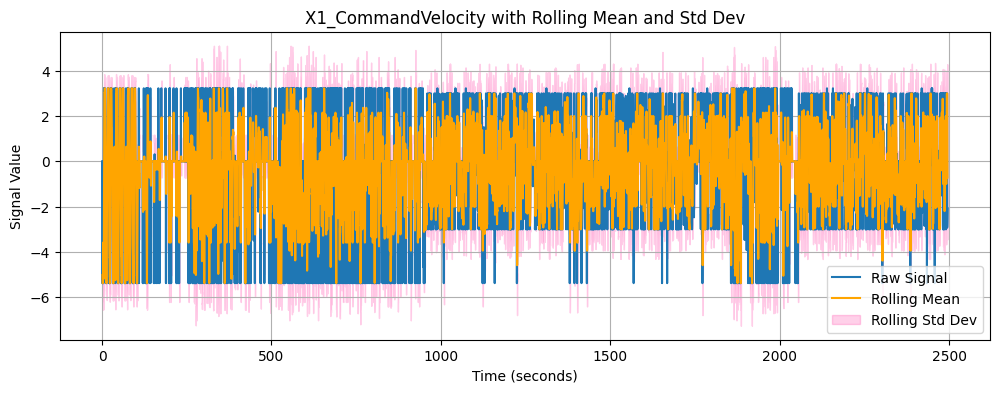

In [18]:
# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

encoded_df = Encoded_df.copy()
encoded_df['time_seconds'] = encoded_df.index.total_seconds()


col = "X1_CommandVelocity"

plt.figure(figsize=(12, 4))
plt.plot(encoded_df['time_seconds'], encoded_df[col], label='Raw Signal')
plt.plot(encoded_df['time_seconds'], encoded_df[f'{col}_roll_mean'], label='Rolling Mean', color='orange')
plt.fill_between(encoded_df['time_seconds'],
                 encoded_df[f'{col}_roll_mean'] - encoded_df[f'{col}_roll_std'],
                 encoded_df[f'{col}_roll_mean'] + encoded_df[f'{col}_roll_std'],
                 color='deeppink', alpha=0.2, label='Rolling Std Dev')

plt.legend()
plt.grid(True)
plt.title(f"{col} with Rolling Mean and Std Dev")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Value")
plt.show()



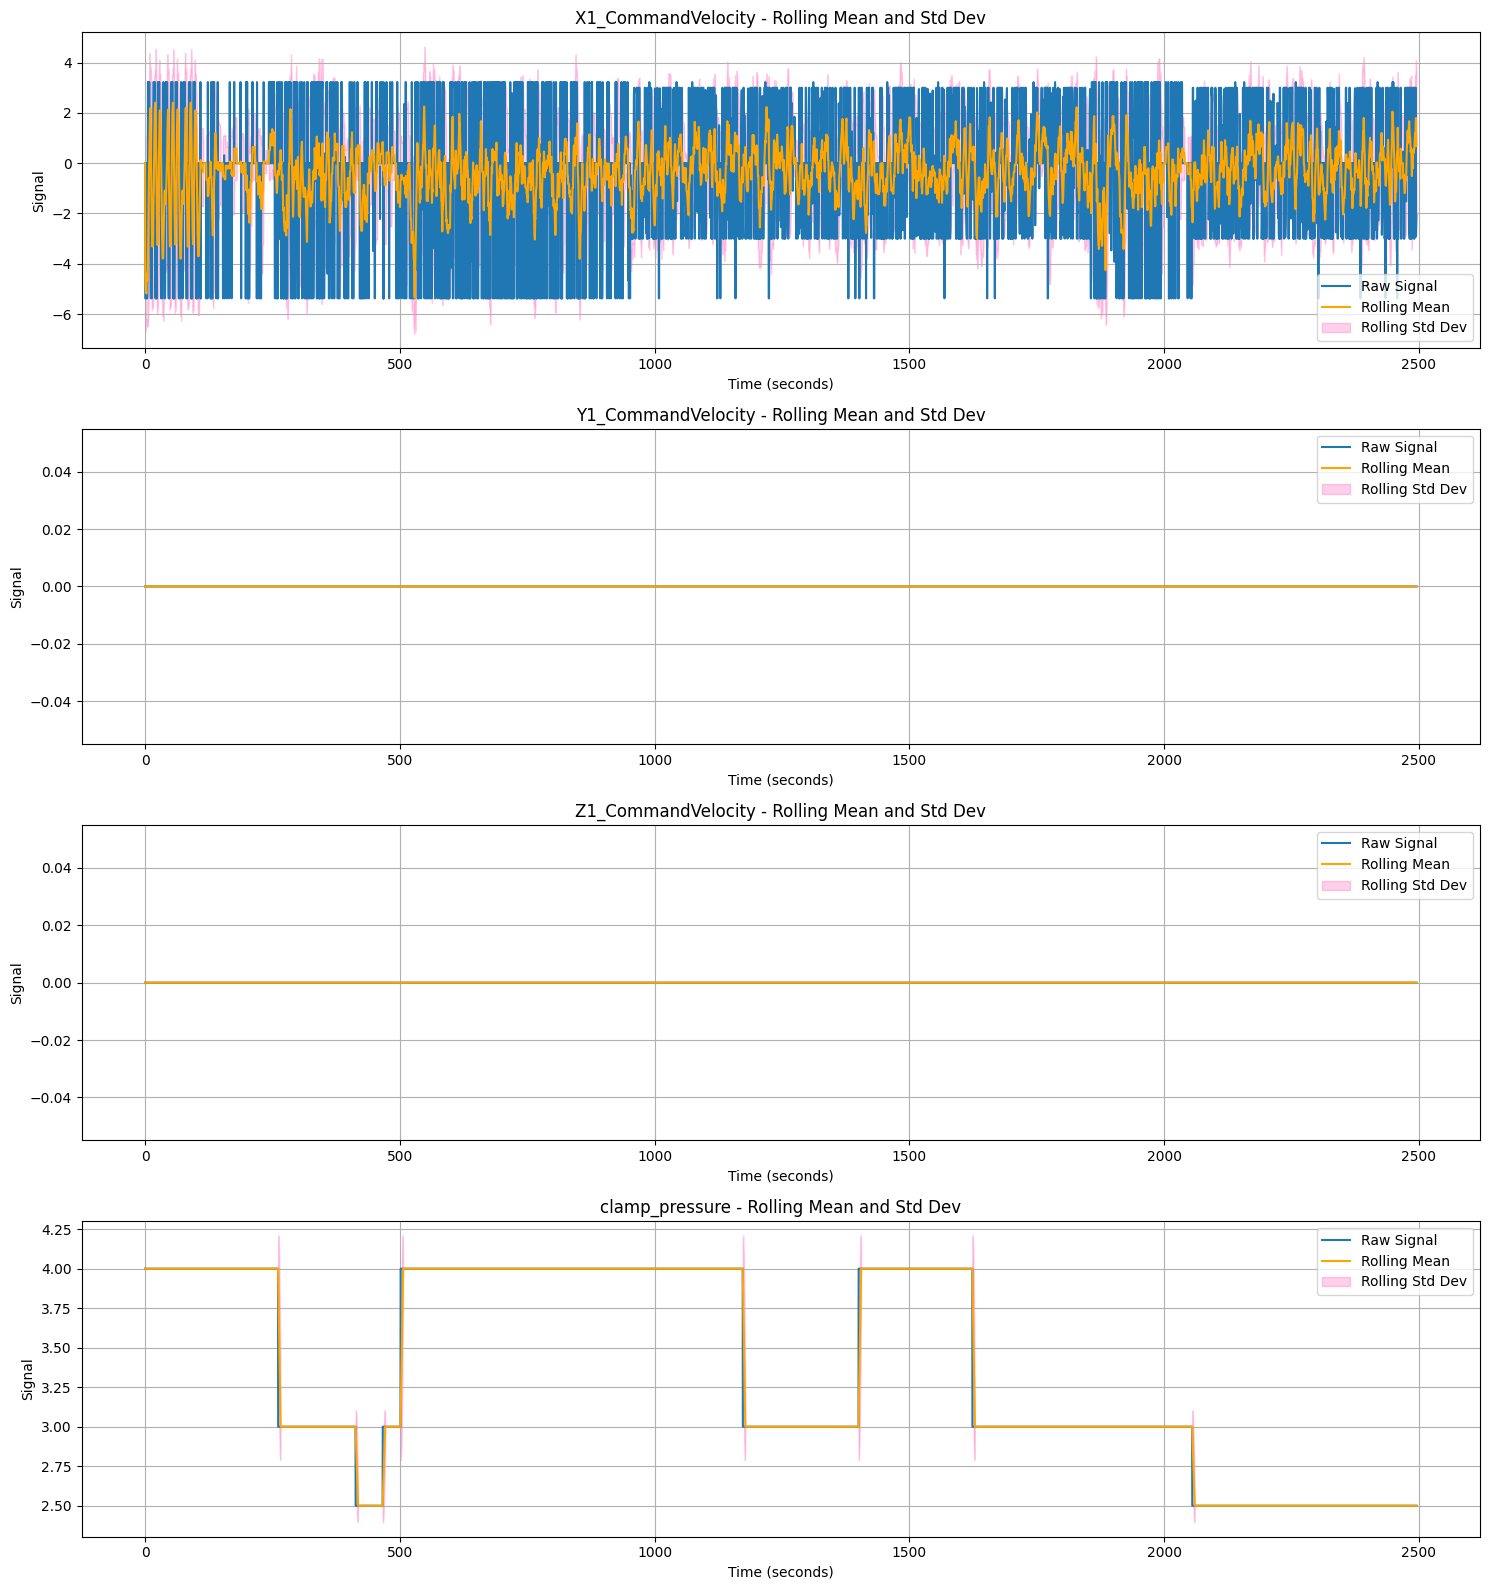

In [19]:
#
import matplotlib.pyplot as plt
import pandas as pd

# Copy to avoid changing original data
df = encoded_df.copy()

# Ensure proper time-based index column
if isinstance(df.index, pd.TimedeltaIndex):
    df['time_seconds'] = df.index.total_seconds()
elif isinstance(df.index, pd.DatetimeIndex):
    df['time_seconds'] = (df.index - df.index[0]).total_seconds()
else:
    df['time_seconds'] = df.index  # fallback if index isn't time-based

# ✅ Columns you want to visualize
selected_columns = [
    "X1_CommandVelocity",
    "Y1_CommandVelocity",
    "Z1_CommandVelocity",
    "clamp_pressure"
]

# Rolling settings
window_size = 50

# 📈 Plot each column in a subplot
num_cols = len(selected_columns)
plt.figure(figsize=(15, 4 * num_cols))

for i, col in enumerate(selected_columns, 1):
    df[f'{col}_roll_mean'] = df[col].rolling(window=window_size, min_periods=1).mean()
    df[f'{col}_roll_std'] = df[col].rolling(window=window_size, min_periods=1).std()
    
    plt.subplot(num_cols, 1, i)
    plt.plot(df['time_seconds'], df[col], label='Raw Signal')
    plt.plot(df['time_seconds'], df[f'{col}_roll_mean'], label='Rolling Mean', color='orange')
    plt.fill_between(df['time_seconds'],
                     df[f'{col}_roll_mean'] - df[f'{col}_roll_std'],
                     df[f'{col}_roll_mean'] + df[f'{col}_roll_std'],
                     color='deeppink', alpha=0.2, label='Rolling Std Dev')
    
    plt.title(f"{col} - Rolling Mean and Std Dev")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Signal")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
